### Using iPython to plot a CSV from an online source

The following code will (1) import various utiltity libraries; (2) read in a csv file from a URL; and (3) plot the data.

- To run the code step-by-step, click on each "Input" cell (e.g. "In [#]:"), and with the mouse in the field, hold down SHIFT and press ENTER.

- To run the entire notebook, selec "Run All" from the "Cell" menu above.

**1. Import libraries.** First, import the libraries we need ...

In [12]:
%matplotlib inline 
# above line allows for showing plots in a cell easily
import matplotlib # the main plotting library
import numpy as np # allows for arrays
import matplotlib.pyplot as plt # getting specific plotting functions
import urllib # URL import functions
import pandas as pd # nice data utilities

**2. File import.** You can add a csv file to the server; but here we're testing loading a csv file from an online location:

In [14]:
url='https://raw.githubusercontent.com/dwblair/riffle-lithium-ion-cold-test/master/2016_3_3_afternoon.csv' # the url for the CSV

In [15]:
response = urllib.request.urlopen(url) # treating the URL as a file

In [16]:
a=pd.read_csv(response,names=['date','temp','batt','a0']) # reading that file in as a CSV

In [ ]:
b=a.index/60 # minutes

In [41]:
from datetime import datetime

t=[]
tp=datetime.strptime(a.date[0],"%Y-%m-%d %H:%M:%S")
tstart=tp.strftime("%s")
    
for i in range (0,len(a.date)):
    tp=datetime.strptime(a.date[i],"%Y-%m-%d %H:%M:%S")
    ts=tp.strftime("%s")
    t.append((float(ts)-float(tstart))/3600) #hours

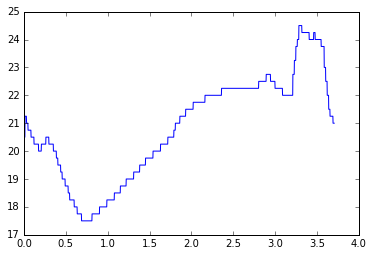

In [42]:
plt.plot(t,a.temp)

In [40]:
220/60

3.6666666666666665

In [19]:
b=a.index; b

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1652, 1653],
           dtype='int64', length=1654)

**4. Plot the data.** 

In [82]:
t=np.array(a['t']); c=np.array(a['c']); # convert the imported data into arrays

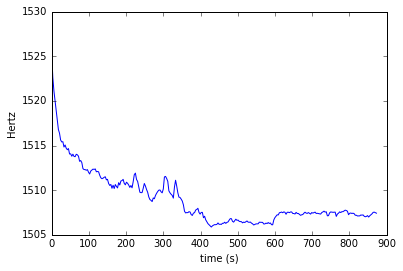

In [83]:
plt.plot(t,c);plt.xlabel('time (s)'); plt.ylabel('Hertz') #plot, and add x and y labels

Let's do some math on c (the list of conductivity values).

What's the average value?

In [84]:
ave=np.average(c); ave  # average of ca

1508.9926369863012

What's the standard deviation? 

In [85]:
sd=np.std(c); sd # standard deviation of ca

3.0079948661519285

What's the minimum value?

In [86]:
min = np.min(c); min # minimum value of ca

1505.8699999999999

Now that we have the average value, we can "normalize" the conductivity values by dividing them all by their average:

In [87]:
c_norm = c / ave # divide all values in ca3 by the average value of c

Let's plot what we've got:

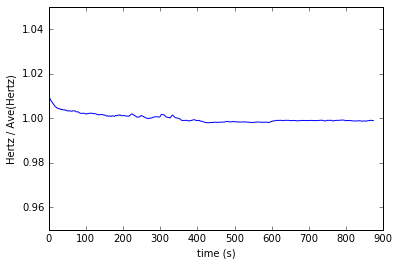

In [88]:
plt.plot(t,c_norm);
plt.ylim(.95,1.05);  # also zoom the graph out a bit
plt.xlabel('time (s)'); plt.ylabel('Hertz / Ave(Hertz)') #add x and y labels